### Doing some linear regressions using base julia, just for fun

Construct a dataset

In [13]:
realβ = 100
popX = sort(rand(100))
popY = (popX * realβ) + rand(100) - 0.5;

Plot it

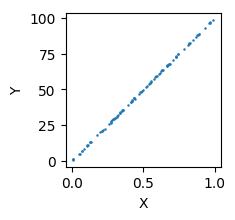

In [14]:
using PyPlot
figure(figsize=(2,2))
scatter(popX, popY, 0.6)
xlabel("X"); ylabel("Y");

To get the beta coefficient of the regression we need to calculate:

           ∑xy
    beta = ---
           ∑x2
          
where ∑xy are is the sum of the cross-products of the devations of X & Y from the mean.

In [15]:
# sum of cross products
∑xy(X,Y) = sum(X .* Y) - (sum(X)*sum(Y))/length(X)
# Regression Coefficient
β(X,Y) = ∑xy(X,Y)/∑xy(X,X)
# intercept
α(X,Y,b=β(X,Y)) = mean(Y) - b*mean(X) 
# full regression
regress(X,Y) = begin
    b = β(X,Y)
    a = α(X,Y,b)
    return b,a
end

regress (generic function with 1 method)

Let's check that all makes sense

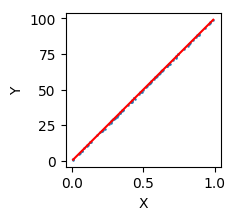

In [16]:
figure(figsize=(2,2))
scatter(popX, popY, 0.6)
m,c = regress(popX,popY)
plot(popX,(popX.*m).+c, color="r")
xlabel("X"); ylabel("Y");

To do any stastics on our regression we need to calculate a few more things
    total sum of squares: "the overall variability of the data"
    regression sum of squares: "variability of regression line"
    residual sum of squares: "error in regression sum of squares"
    residual mean squares: "normalise by degrees of freedom"
    
R-squared ("strength of the relationship") is simply:
    
    regression SS
    ---------------
    total SS
    
To calculate the F-statisctics (ANOVA) we simply take:
    
    regression MS
    ---------------
    residual MS
    
To calculate a t-statistic (student's T) we first need to get the standard error of the coefficient:

                   resuidual MS
    varianceBeta = ------------
                   sum of squares of X
                   
Then divide the difference from the hypothesis by the square root of the variance

    b - beta0 (hypothesis)
    ----------------------
    SEBeta    

In [17]:
# sum of squares
totSS(Y) = ∑xy(Y,Y) # total
regSS(X,Y,b=β(X,Y)) = b*∑xy(X,Y) # regression
resSS(X,Y,b=β(X,Y)) = totSS(Y) - regSS(X,Y,b) # residual

# residual mean squares
resMS(X,Y) = (resSS(X,Y)/(length(X)-2))
# variance
varβ(X,Y) = resMS(X,Y)/∑xy(X,X)

# Statistics
F(X,Y) = regSS(X,Y)/resMS(X,Y)
R²(X,Y) = regSS(X,Y)/totSS(Y)
t(X,Y, b=β(X,Y), β₀=0) = (b - β₀)/√(varβ(X,Y))

t (generic function with 3 methods)

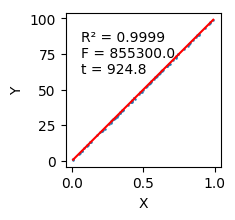

PyObject <matplotlib.text.Text object at 0x7f65f0233810>

In [18]:
figure(figsize=(2,2))
ax = subplot(111)
scatter(popX, popY, 0.6)
m,c = regress(popX,popY)
plot(popX,(popX.*m).+c, color="r")
xlabel("X"); ylabel("Y");
text(0.1,0.5,"""
    R² = $(signif(R²(popX,popY),4))
    F = $(signif(F(popX,popY),4))
    t = $(signif(t(popX,popY),4))
    """, transform=transform=ax[:transAxes])